<a href="https://colab.research.google.com/github/AngelBReal/intro_python_mcd/blob/main/AABR_Proyecto_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis Comparativo del Personal de Salud en Sonora y Regiones de México: Un Estudio Exploratorio
##Introducción
#####En este proyecto, se analizan los datos sobre el personal en instituciones de salud en México, informacion sacade de los recursos de sector salud (http://www.dgis.salud.gob.mx/contenidos/basesdedatos/da_recursos_gobmx.html) , con un enfoque particular en el estado de Sonora. Se han seguido los siguientes pasos para llevar a cabo el análisis:

Descarga de datos: Utilizamos pandas para descargar y manipular los datos.

1.   Transformación de datos: Se muestra el tipo de datos más importantes y se genera un índice utilizando las fechas transformadas a tipo timestamp.
2.   Filtrado de datos: Los datos se filtran para un solo año y se centran en el estado de Sonora.
1.   Modificación de variables cualitativas: Se modifican los valores de variables cualitativas para que sean más representativos en el análisis.
2.   Análisis exploratorio: Se realiza un análisis exploratorio básico utilizando pandas, creando gráficas que muestran detalles importantes o interesantes y realizando algunas reagrupaciones simples o complejas.
1.   Reflexión final: Se escribe una reflexión sobre los hallazgos importantes o interesantes obtenidos durante el análisis.

##Importación de Librerías
#####Importamos las librerías necesarias para la manipulación y visualización de dato
#####Cargamos el archivo CSV que contiene los datos sobre el personal de salud en México.



In [507]:
import pandas as pd
import unicodedata
import re
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el archivo CSV
file_path = '/content/Data/BD ABIERTOS SECTORIAL 2022-CSV.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Mostrar información básica del dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21737 entries, 0 to 21736
Columns: 229 entries, AÑO to Otro personal
dtypes: float64(198), int64(22), object(9)
memory usage: 38.0+ MB


,AÑO,CLUES,SECTOR,Institución,Clave Estado,Nombre Estado,Clave Municipio,Nombre Municipio,Clave Localidad,Nombre Localidad,...,Personal Técnico en Banco de Sangre,Personal Técnico en inhaloterapia,Partera,Otro personal técnico,Total otro personal,Personal administrativo,Personal en archivo clínico,Personal en conservación y mantenimiento,Personal de Intendencia (incluye lavandería),Otro personal
0,2022,DIFSC000001,PÚBLICO,DIF,9,CIUDAD DE MEXICO,3,COYOACAN,1,COYOACAN,...,0.0,0.0,0.0,0.0,14,11.0,1.0,0.0,2.0,0.0
1,2022,DIFSC000002,PÚBLICO,DIF,4,CAMPECHE,2,CAMPECHE,1,CAMPECHE,...,0.0,0.0,0.0,0.0,41,0.0,2.0,1.0,6.0,32.0
2,2022,DIFSC000003,PÚBLICO,DIF,8,CHIHUAHUA,19,CHIHUAHUA,1,CHIHUAHUA,...,0.0,0.0,0.0,0.0,44,16.0,1.0,1.0,7.0,19.0
3,2022,DIFSC000004,PÚBLICO,DIF,15,MEXICO,106,TOLUCA,1,TOLUCA DE LERDO,...,0.0,0.0,0.0,0.0,32,18.0,1.0,5.0,8.0,0.0
4,2022,DIFSC000005,PÚBLICO,DIF,2,BAJA CALIFORNIA,1,ENSENADA,1,ENSENADA,...,0.0,0.0,0.0,0.0,7,3.0,1.0,2.0,0.0,1.0


##Preparación de Datos
#####Establecemos la columna CLUES como índice del DataFrame y normalizamos los nombres de las columnas para facilitar su manejo.

In [508]:
# Establecer la columna CLUES como índice
data.set_index('CLUES', inplace=True)

# Función para normalizar nombres de columnas
def clean_column_names(column):
    # Eliminar espacios al inicio y al final
    column = column.strip()
    # Reemplazar espacios por guiones bajos
    column = column.replace(' ', '_')
    # Convertir a minúsculas
    column = column.lower()
    # Normalizar caracteres acentuados
    column = unicodedata.normalize('NFKD', column).encode('ascii', 'ignore').decode('utf-8')
    # Reemplazar caracteres no alfanuméricos (excepto guiones bajos) por nada
    column = re.sub(r'[^a-zA-Z0-9_]', '', column)
    return column

# Aplicar la función de normalización a todas las columnas
data.columns = [clean_column_names(col) for col in data.columns]

##Selección y Limpieza de Datos
#####Eliminamos las columnas que no son relevantes para nuestro análisis.

In [496]:
#Listar columnas para quitar del DF
columns_to_drop = [
    'cuenta_con_agua_potable',
 'cuenta_con_red_municipal',
 'cuenta_con_pozo',
 'cuenta_con_cisterna',
 'cuenta_con_otra_fuente',
 'cuenta_con_drenaje',
 'cuenta_con_planta_electrica',
 'cuenta_con_radio_banda_civil',
 'cuenta_con_internet',
 'cuenta_con_red_de_voz',
 'cuenta_con_red_de_datos',
 'cuenta_con_sistema_de_telemedicina',
 'cuenta_con_expediente_clinico_electronico',
 'cuenta_con_area_de_hospitalizacion',
 'cuenta_con_area_de_unidad_quirurgica',
 'cuenta_con_unidad_de_cuidados_intensivos',
 'cuenta_con_area_de_unidades_de_cuidados_intensivos_neonatales',
 'cuenta_con_unidad_de_cuidados_intermedios',
 'cuenta_con_area_cuidados_coronarios',
 'cuenta_con_servicio_de_medicina_fisica_y_rehabilitacion',
 'cuenta_con_area_de_cirugia_ambulatoria',
 'cuenta_con_area_de_hemodialisis',
 'cuenta_con_area_de_radioterapia_incluye_teleterapia_y_braquiterapia',
 'cuenta_con_area_de_quimioterapia',
 'cuenta_con_area_de_unidad_de_quemados',
 'cuenta_con_area_de_laboratorio_clinico',
 'cuenta_con_area_de_urgencias',
 'cuenta_con_area_de_tocologia_y_tococirugia',
 'cuenta_con_area_de_neonatologia_y_cunero',
 'cuenta_con_area_de_banco_de_sangre',
 'quirofanos',
 'salas_de_expulsion',
 'cunas_para_recien_nacido_sano_incluye_las_ubicadas_en_tocologia_como_en_neonatologia_y_cuneros',
 'ambulancias',
 'total_de_consultorios',
 'consultorios_de_medicina_general',
 'consultorios_de_medicina_familiar',
 'consultorios_de_estomatologia',
 'consultorios_de_planificacion_familiar',
 'consultorios_de_cirugia_maxilo_facial',
 'consultorios_de_alergologia',
 'consultorios_de_angiologia',
 'consultorios_de_cardiologia',
 'consultorios_de_cirugia_general_y_cirugia',
 'consultorios_de_dermatologia',
 'consultorios_de_endocrinologia',
 'consultorios_de_epidemiologia',
 'consultorios_de_gastroenterologia',
 'consultorios_de_geriatria',
 'consultorios_de_ginecoobstetricia',
 'consultorios_de_hematologia',
 'consultorios_de_infectologia',
 'consultorios_de_medicina_de_rehabilitacion',
 'consultorios_de_medicina_del_dolor',
 'consultorios_de_medicina_interna',
 'consultorios_de_nefrologia',
 'consultorios_de_neumologia',
 'consultorios_de_neurologia',
 'consultorios_de_nutricion',
 'consultorios_de_oftalmologia',
 'consultorios_de_oncologia',
 'consultorios_de_ortopedia',
 'consultorios_de_otorrinolaringologia',
 'consultorios_de_pediatria',
 'consultorios_de_proctologia',
 'consultorios_de_psicologia',
 'consultorios_de_psiquiatria',
 'consultorios_de_reumatologia',
 'consultorios_de_urologia',
 'consultorios_de_traumatologia',
 'consultorios_en_area_de_urgencias',
 'consultorios_de_valoracion',
 'consultorios_de_otras_especialidades',
 'total_camas_area_hospitalizacion',
 'camas_de_aislados',
 'camas_de_medicina_general',
 'camas_de_angiologia',
 'camas_de_cardiologia',
 'camas_de_cirugia_general_y_cirugia_reconstructiva',
 'camas_de_gastroenterologia',
 'camas_de_geriatria',
 'camas_de_ginecoobstetricia',
 'camas_de_hematologia',
 'camas_de_infectologia',
 'camas_de_medicina_interna',
 'camas_de_nefrologia',
 'camas_de_neumologia',
 'camas_de_neurologia',
 'camas_de_oftalmologia',
 'camas_de_oncologia',
 'camas_de_ortopedia',
 'camas_de_otorrinolaringologia',
 'camas_de_pediatria',
 'camas_de_proctologia',
 'camas_de_psiquiatria',
 'camas_de_reumatologia',
 'camas_de_urologia',
 'camas_de_traumatologia',
 'camas_de_otras_especialidades_en_area_de_hospitalizacion',
 'total_camas_en_otras_areas_no_considera_hospitalizacion',
 'camas_en_recuperacion_postquirurgica',
 'camas_en_la_unidad_de_cuidados_intensivos_incluye_pediatricas_y_adulto',
 'camas_en_la_unidad_de_cuidados_intermedios_incluye_pediatricas_y_adulto',
 'camas_en_cuidados_coronarios',
 'camas_de_recuperacion_en_cirugia_ambulatoria',
 'camas_en_area_de_radioterapia_incluye_teleterapia_y_braquiterapia',
 'camas_en_quimioterapia_aplicacion_hospitalizada',
 'camas_de_quemados',
 'camas_en_la_unidad_de_transplante_de_medula_osea',
 'camas_en_area_de_urgencias',
 'camas_de_observacion_en_area_de_curaciones',
 'camas_en_area_de_labor_de_parto',
 'camas_en_area_de_recuperacion_postparto',
 'camas__en_otras_areas_no_considerando_area_de_hospitalizacion',
 'aceleradores_lineales',
 'cunas_de_calor_radiante',
 'incubadoras',
 'mastografos_analogico_y_digital',
 'equipos_de_resonancia_magnetica',
 'tomografos_computados',
 'unidades_de_hemodialisis_incluye_con_osmosis_inversa_y_pediatrica',
 'ultrasonido',
 'litotriptores',
 'electrocardiografos',
 'electroencefalografos',
 'total_medicos_generales_especialistas_y_odonologos',
 'numero_demedicos_neumologos',
 'medicos_residentes',
 'total_personal_tecnico',
 'total_personal_medico_en_formacion',
 'total_medicos_en_otras_labores',
 'medicos_en_labores_administrativas',
 'medicos_en_labores_de_ensenanza_e_investigacion',
 'medicos_epidemiologos',
 'medicos_anatomopatologos',
 'medicos_otras_actividades',
 'total_enfermeras_en_contacto_con_el_paciente',
 'total_enfermeras_en_otras_labores',
 'numero_personal_de_enfermeria_en_labores_administrativas',
 'personal_de_enfermeria_en_labores_de_ensenanza_e_investigacion',
 'personal_de_enfermeria_en_otras_actividades',
 'total_personal_profesional',
]

# Drop las columnas especificadas
data = data.drop(columns=columns_to_drop)

#####Seleccionamos las columnas de interés que contienen información sobre el personal de salud.



In [497]:
# Definir las columnas de interés para el análisis
columna_medicos = [
    'medicos_generales',
 'medicos_familiares',
 'pediatras',
 'ginecoobstetras',
 'medicos_cirujanos',
 'medicos_internistas',
 'medicos_oftalmologos',
 'medicos_otorrinonaringologos',
 'medicos_traumatologos',
 'medicos_dermatologos',
 'medicos_anestesiologos',
 'medicos_psiquiatras',
 'odontologos',
 'odontologos_especialistas_incluye_cirujano',
 'medicos_endrocrinologos',
 'medicos_gastroenterologos',
 'medicos_cardiologos',
 'medicos_en_rehabilitacion_medicina_fisica',
 'medicos_urologos',
 'medicos_cirujanos_plasticos_y_reconstructivos',
 'medicos_neurologos',
 'medicos_oncologos',
 'medicos_hematologos',
 'medicos_urgenciologos',
 'medicos_ortopedistas',
 'medicos_proctologos',
 'medicos_angiologos_vascular_periferico',
 'medicos_nefrologos',
 'medicos_reumatologos',
 'medicos_infectologos',
 'medicos_geriatras',
 'medicos_genetistas',
 'medicos_alergologos',
 'medicos_radiologos',
 'medicos_otras_especialidades',
]

columna_pasantes = [
  'pasantes_de_medicina',
 'pasante_de_odontologia',
 'interno_de_pregrado',
]

columna_tecnicos = [
    'personal_tecnico_en_odontologia',
 'personal_tecnico_en_trabajo_social',
 'personal_tecnico_electromedico_electrocardiografia_y_electroencefalografia',
 'personal_tecnico_en_laboratorio',
 'personal_tecnico_en_estadistica',
 'perosnal_tecnico_en_atencion_primaria_tap_s_prodiap_s',
 'personal_tecnico_en_rehabilitacion_fisica',
 'personal_tecnico_en_anestesiologia',
 'personal_tecnico_en_radiologia',
 'personal_tecnico_dietista_incluye_nutricionistas',
 'personal_tecnico_promotores_de_salud',
 'personal_tecnico_en_histopatologia',
 'personal_tecnico_en_citotecnologia',
 'personal_tecnico_en_banco_de_sangre',
 'personal_tecnico_en_inhaloterapia',
 'partera',
 'otro_personal_tecnico'
]

columna_enfermeros = [
    'personal_de_enfermeria_general',
 'personal_de_enfermeria_especialista',
 'personal_de_enfermeria_pasante',
 'personal_de_enfermeria_auxiliar',
]

# Crear columnas basados en estas agrupaciones
data['grupo_medicos'] = data[columna_medicos].sum(axis=1)
data.drop(columns=columna_medicos, inplace=True)

data['grupo_pasantes'] = data[columna_pasantes].sum(axis=1)
data.drop(columns=columna_pasantes, inplace=True)

data['grupo_tecnicos'] = data[columna_tecnicos].sum(axis=1)
data.drop(columns=columna_tecnicos, inplace=True)

data['grupo_enfermeria'] = data[columna_enfermeros].sum(axis=1)
data.drop(columns=columna_enfermeros, inplace=True)

#Capturar los diferentes estados en el DF
unique_estados = data['nombre_estado'].unique()
unique_estados

array(['CIUDAD DE MEXICO', 'CAMPECHE', 'CHIHUAHUA', 'MEXICO',
       'BAJA CALIFORNIA', 'GUANAJUATO', 'NUEVO LEON', 'SONORA', 'NAYARIT',
       'COAHUILA DE ZARAGOZA', 'COLIMA', 'CHIAPAS', 'DURANGO', 'GUERRERO',
       'JALISCO', 'MICHOACAN DE OCAMPO', 'MORELOS', 'OAXACA', 'PUEBLA',
       'QUINTANA ROO', 'SINALOA', 'TABASCO', 'TLAXCALA', 'TAMAULIPAS',
       'VERACRUZ DE IGNACIO DE LA LLAVE', 'ZACATECAS',
       'BAJA CALIFORNIA SUR', 'HIDALGO', 'QUERETARO', 'SAN LUIS POTOSI',
       'YUCATAN', 'AGUASCALIENTES'], dtype=object)

In [498]:
# Filtrar los datos para la región Norte
estados_norte = ['BAJA CALIFORNIA', 'SONORA', 'CHIHUAHUA', 'COAHULIA DE ZARAGOZA', 'NUEVO LEON', 'TAMAULIPAS']
estados_noccidente = ['BAJA CALIFORNIA SUR', 'SINALOA', 'NAYARIT', 'DURANGO', 'ZACATECAS']
estados_centro =['GUANAJUATO', 'AGUASCALIENTES', 'QUERETARO', 'SAN LUIS POTOSI', 'HIDALGO', 'CIUDAD DE MEXICO', 'MEXICO', 'MORELOS', 'TLAXCALE', 'PUEBLA', 'MICHOACAN DE OCAMPO']
estados_sur = ['GUERRERO', 'OAXACA', 'CHIAPAS', 'VERACRUZ DE IGNACIO DE LA LLAVE', 'TABASCO', 'CAMPECHE', 'YUCATAN' ,'QUINTANA ROO', 'COLIMA']

filtered_data_sonora = data[(data['ano'] == 2022) & (data['nombre_estado'] == 'SONORA')]
filtered_data_all = data[data['ano'] == 2022]
filtered_data_norte = data[(data['ano'] == 2022) & (data['nombre_estado'].isin(estados_norte))]
filtered_data_noccidente = data[(data['ano'] == 2022) & (data['nombre_estado'].isin(estados_noccidente))]
filtered_data_centro = data[(data['ano'] == 2022) & (data['nombre_estado'].isin(estados_centro))]
filtered_data_sur = data[(data['ano'] == 2022) & (data['nombre_estado'].isin(estados_sur))]


##Cálculo de Promedios
#####Calculamos los promedios nacionales y regionales para las columnas seleccionadas.

In [499]:
# Agragar las columnas que usare
columns_to_include = ['grupo_pasantes', 'grupo_tecnicos', 'grupo_enfermeria', 'total_otro_personal']

# Nombres nuevos a columnas
new_column_names = {
    'grupo_pasantes': 'Pasantes',
    'grupo_tecnicos': 'Tecnicos',
    'grupo_enfermeria': 'Enfermeros',
    'total_otro_personal': 'Otro Personal'
}

#Seleccionar las columnas que usare
filtered_data_all = filtered_data_all[columns_to_include]
filtered_data_sonora = filtered_data_sonora[columns_to_include]
filtered_data_norte = filtered_data_norte[columns_to_include]
filtered_data_noccidente = filtered_data_noccidente[columns_to_include]
filtered_data_centro = filtered_data_centro[columns_to_include]
filtered_data_sur = filtered_data_sur[columns_to_include]

## Calcular los promedios para la Mexico
national_averages = filtered_data_all.mean()

#Calcular los promedios para la región de Sonora
sonora_averages = filtered_data_sonora.mean()

# Calcular los promedios para la región Norte
norte_averages = filtered_data_norte.mean()

#Calcular los promedios para la región Nor Occidebte
noocidente_averages = filtered_data_noccidente.mean()

## Calcular los promedios para la región centro
centro_averages = filtered_data_centro.mean()

# Calcular los promedios para la región sur
sur_averages = filtered_data_sur.mean()


##Visualización de Datos
###Comparación Nacional vs Regiones de Mexico
#####Creamos un gráfico de barras para comparar los promedios nacionales con los de Sonora.

In [500]:
# Definir funcion para plotear las graficas (Añadir etiquetas a barras)
def autolabel(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


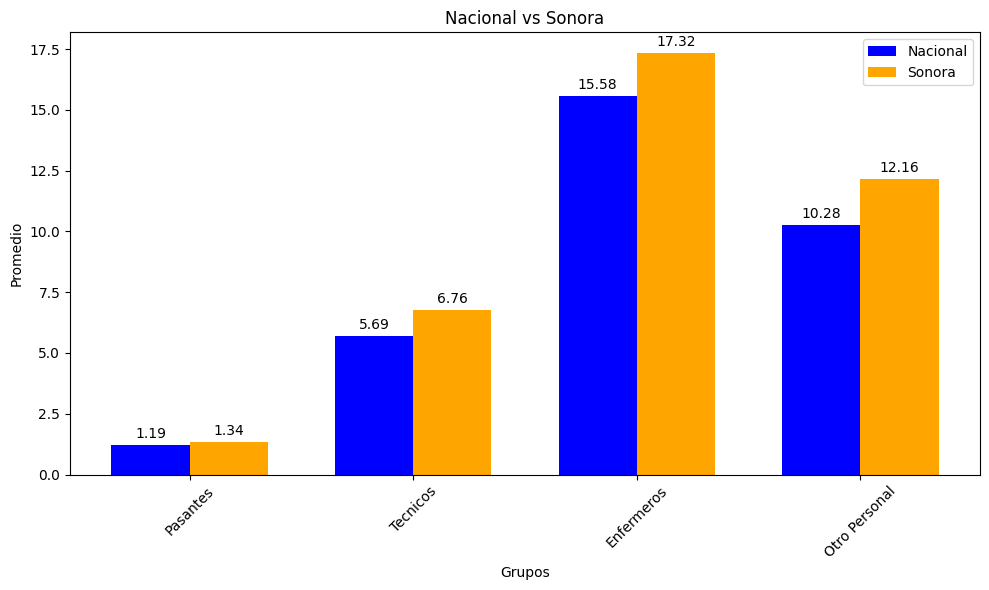

In [501]:
# Plot los promedios por grupos
x = np.arange(len(columns_to_include))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, national_averages, width, label='Nacional', color='blue')
bars2 = ax.bar(x + width/2, sonora_averages, width, label='Sonora', color='orange')

#Agrega nombre a los axis y, x y labels
ax.set_xlabel('Grupos')
ax.set_ylabel('Promedio')
ax.set_title('Nacional vs Sonora')

#Usar los nuevos nombres para el axis x
ax.set_xticks(x)
ax.set_xticklabels([new_column_names[col] for col in columns_to_include], rotation=45)
ax.legend()

autolabel(bars1, ax)
autolabel(bars2, ax)

fig.tight_layout()

plt.show()

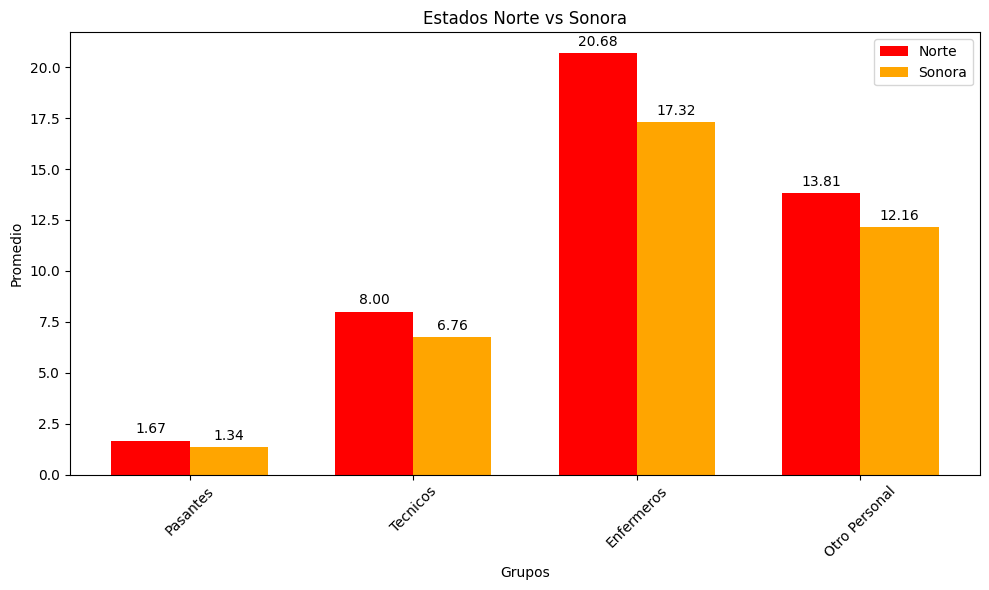

In [502]:
# Norte plot
fig_norte, ax_norte = plt.subplots(figsize=(10, 6))
bars_norte1 = ax_norte.bar(x - width/2, norte_averages, width, label='Norte', color='red')
bars_norte2 = ax_norte.bar(x + width/2, sonora_averages, width, label='Sonora', color='orange')

# Agrage labels, titulos and x-axis, labes, etc.
ax_norte.set_xlabel('Grupos')
ax_norte.set_ylabel('Promedio')
ax_norte.set_title('Estados Norte vs Sonora')

# Usar nuevos nombres para las columnas
ax_norte.set_xticks(x)
ax_norte.set_xticklabels([new_column_names[col] for col in columns_to_include], rotation=45)
ax_norte.legend()

autolabel(bars_norte1, ax_norte)
autolabel(bars_norte2, ax_norte)

fig_norte.tight_layout()
plt.show()

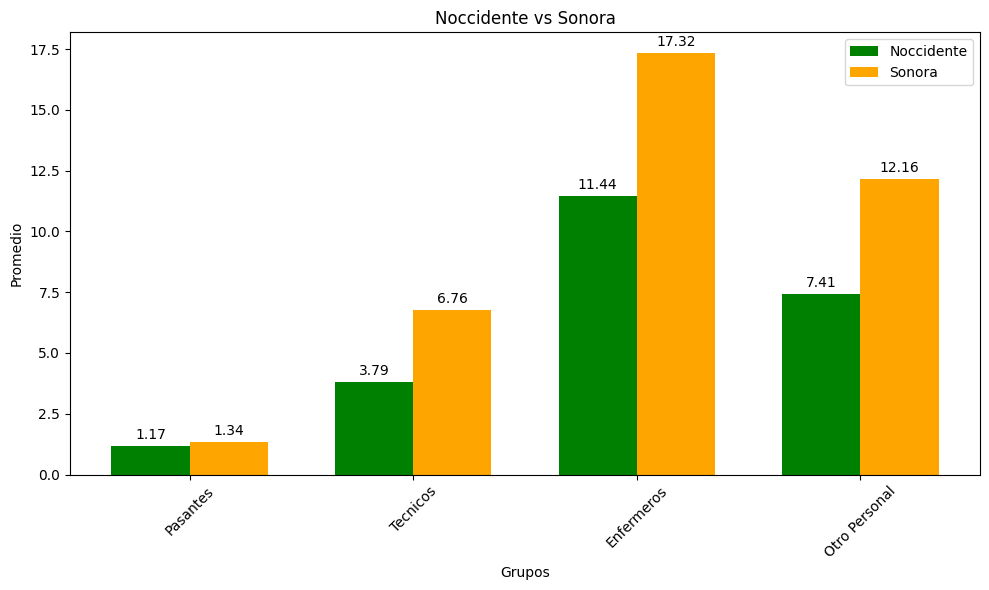

In [503]:
# Plot Noccidente vs Sonora
fig_noccidente, ax_noccidente = plt.subplots(figsize=(10, 6))
bars_noccidente1 = ax_noccidente.bar(x - width / 2, noocidente_averages, width, label='Noccidente', color='green')
bars_noccidente2 = ax_noccidente.bar(x + width / 2, sonora_averages, width, label='Sonora', color='orange')

ax_noccidente.set_xlabel('Grupos')
ax_noccidente.set_ylabel('Promedio')
ax_noccidente.set_title('Noccidente vs Sonora')
ax_noccidente.set_xticks(x)
ax_noccidente.set_xticklabels([new_column_names[col] for col in columns_to_include], rotation=45)
ax_noccidente.legend()

autolabel(bars_noccidente1, ax_noccidente)
autolabel(bars_noccidente2, ax_noccidente)

fig_noccidente.tight_layout()
plt.show()

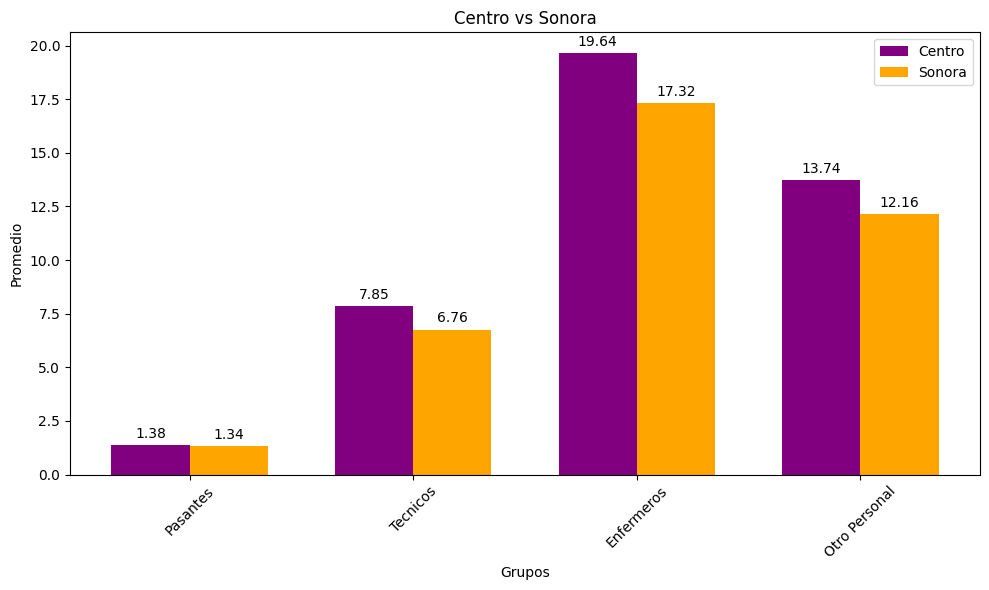

In [504]:
# Plot Centro vs Sonora
fig_centro, ax_centro = plt.subplots(figsize=(10, 6))
bars_centro1 = ax_centro.bar(x - width / 2, centro_averages, width, label='Centro', color='purple')
bars_centro2 = ax_centro.bar(x + width / 2, sonora_averages, width, label='Sonora', color='orange')

ax_centro.set_xlabel('Grupos')
ax_centro.set_ylabel('Promedio')
ax_centro.set_title('Centro vs Sonora')
ax_centro.set_xticks(x)
ax_centro.set_xticklabels([new_column_names[col] for col in columns_to_include], rotation=45)
ax_centro.legend()

autolabel(bars_centro1, ax_centro)
autolabel(bars_centro2, ax_centro)

fig_centro.tight_layout()
plt.show()

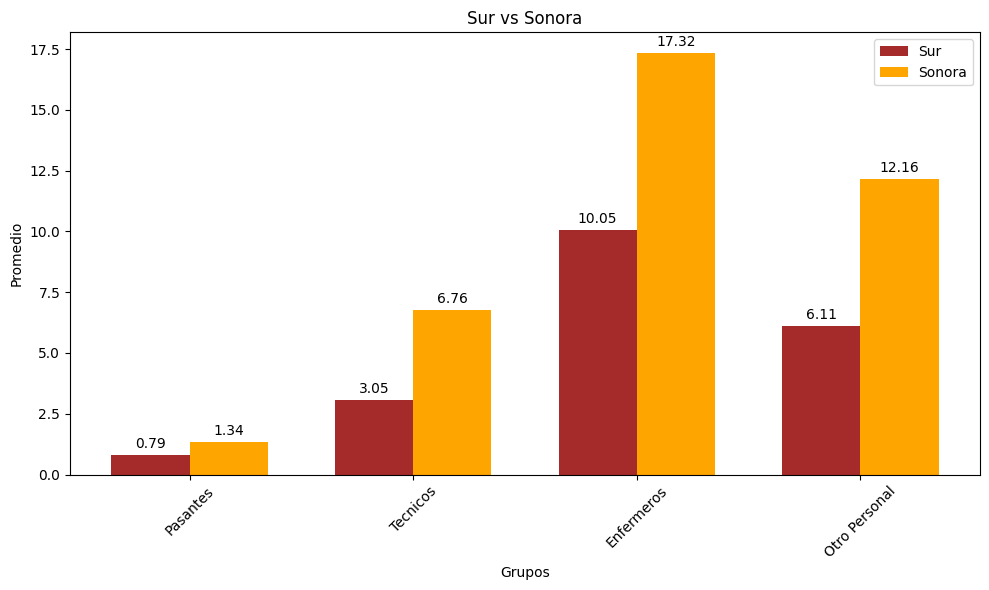

In [505]:
# Plot Sur vs Sonora
fig_sur, ax_sur = plt.subplots(figsize=(10, 6))
bars_sur1 = ax_sur.bar(x - width / 2, sur_averages, width, label='Sur', color='brown')
bars_sur2 = ax_sur.bar(x + width / 2, sonora_averages, width, label='Sonora', color='orange')

ax_sur.set_xlabel('Grupos')
ax_sur.set_ylabel('Promedio')
ax_sur.set_title('Sur vs Sonora')
ax_sur.set_xticks(x)
ax_sur.set_xticklabels([new_column_names[col] for col in columns_to_include], rotation=45)
ax_sur.legend()

autolabel(bars_sur1, ax_sur)
autolabel(bars_sur2, ax_sur)

fig_sur.tight_layout()
plt.show()

##Conclusiones
#####En esta sección, se presentarán las conclusiones obtenidas del análisis comparativo del personal de salud en Sonora con respecto a los promedios nacionales y regionales.

### Como conclusión, he encontrado varios puntos importantes: Sonora se encuentra por encima del promedio en cuanto a personal en instituciones de salud en comparación con los estados del norte y el centro del país, donde estamos muy por debajo del promedio. Sin embargo, en comparación con los estados del norte occidental, Sonora tiene un mayor número de personal, y esta diferencia es aún mayor cuando se compara con los estados del sur. Cabe destacar que, según los resultados de las gráficas, el promedio de pasantes es casi el mismo en todas las regiones, siendo este grupo el que presenta menos diferencias a nivel nacional. Sería interesante utilizar estos datos junto con la densidad poblacional y la cantidad de graduados en el área de salud por estado en México para realizar una comparativa más exhaustiva.